# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo


# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


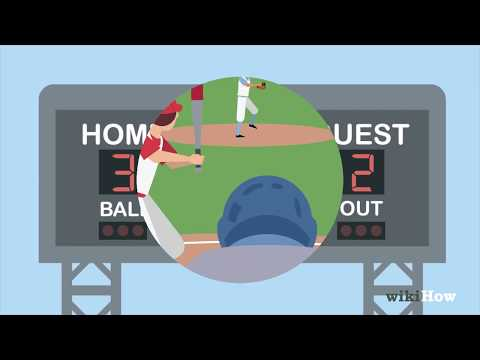

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [3]:
DATA_PATH = "./data/baseballdatabank-2023/"

people = pd.read_csv(DATA_PATH + "core/People.csv")
salaries = pd.read_csv(DATA_PATH + "contrib/Salaries.csv")
pitching = pd.read_csv(DATA_PATH + "core/Pitching.csv")

salaries = salaries.query("yearID <= 2010").copy()
pitching = pitching.query("yearID <= 2010").copy()

salaries.drop_duplicates(subset=["playerID", "yearID"], keep="first", inplace=True)

print("The size of the people dataframe is:", people.size)
print("The size of the salaries dataframe is:", salaries.size)
print("The size of the pitching dataframe is:", pitching.size)

The size of the people dataframe is: 496224
The size of the salaries dataframe is: 106755
The size of the pitching dataframe is: 1212990


In [6]:
pitching.shape

(40433, 30)

**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [7]:
people = people.query("throws == 'L' or throws == 'R'").copy() # remark: contains a row with "S" in the "throws" column
# people

In [9]:
people.shape

(19698, 24)

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [11]:
# Merge the pitching and people data in a left-joint manner
pitching_people = pd.merge(pitching, people, how="left", on="playerID")

In [12]:
pitching_people.shape

(40433, 53)

**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

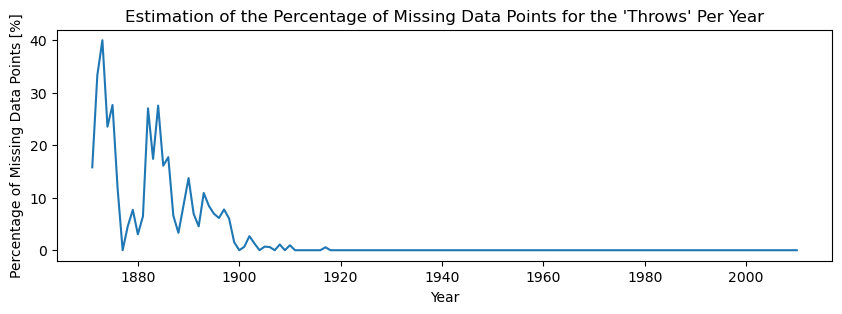

The percentage of the missing data points for the 'throws' in 1892 is: 4.55%


In [13]:
percentage_of_missing_throws = pitching_people.groupby(by="yearID").apply(lambda x: 1-x["throws"].count()/len(x["throws"]))

plt.figure(figsize=(10, 3))
plt.plot(percentage_of_missing_throws.index, percentage_of_missing_throws*100)
plt.xlabel("Year")
plt.ylabel("Percentage of Missing Data Points [%]")
plt.title("Estimation of the Percentage of Missing Data Points for the 'Throws' Per Year")
plt.show()

print("The percentage of the missing data points for the 'throws' in 1892 is: {:.2f}%".format(percentage_of_missing_throws[1892]*100))

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [14]:
pitching_people = pitching_people.query("yearID >= 1920").copy()
salaries = salaries.query("yearID >= 1920").copy()

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [14]:
pitching_people_salary = pd.merge(pitching_people, salaries, how="left", on=["playerID", "yearID", "teamID", "lgID"])
pitching_people_salary

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


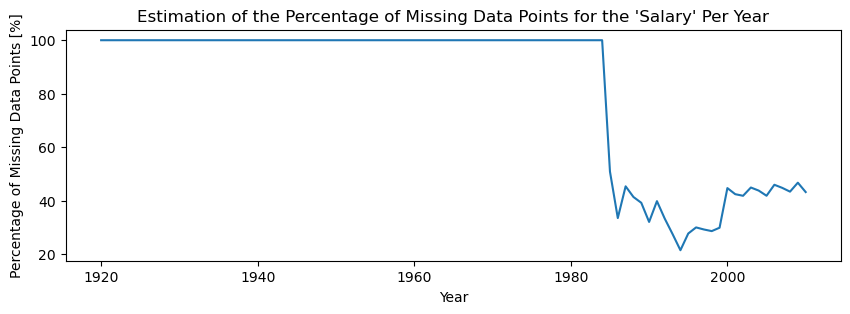

The percentage of the missing data points for the 'salary' in 2002 is: 41.88%


In [15]:
percentage_of_missing_salary = pitching_people_salary.groupby(by=["yearID"]).apply(lambda x: 1-x["salary"].count()/len(x["salary"]))

plt.figure(figsize=(10, 3))
plt.plot(percentage_of_missing_salary.index, percentage_of_missing_salary*100)
plt.xlabel("Year")
plt.ylabel("Percentage of Missing Data Points [%]")
plt.title("Estimation of the Percentage of Missing Data Points for the 'Salary' Per Year")
plt.show()

print("The percentage of the missing data points for the 'salary' in 2002 is: {:.2f}%".format(percentage_of_missing_salary[2002]*100))

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [16]:
# Print the years that have salary data
year_existing_salary = pitching_people_salary.groupby("yearID").apply(lambda x: x["salary"].any())
year_existing_salary[year_existing_salary].index

Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010],
      dtype='int64', name='yearID')

In [11]:
print("The first and last year for which there exists any salary data is 1985 and 2010.")

The first and last year for which there exists any salary data is 1985 and 2010.


In [17]:
# Filter the dataframe to only include data between 1985 and 2010
pitching_people_salary = pitching_people_salary.query("yearID >= 1985 and yearID <= 2010").copy()
pitching_people_salary

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [2]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


In [20]:
df["playerID"].value_counts()

playerID
mulhote01    26
weathda01    25
moyerja01    25
maddugr01    24
wellsda01    24
             ..
giovaed01     1
chavean01     1
jamesde01     1
garciha01     1
izquiha02     1
Name: count, Length: 3083, dtype: int64

Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

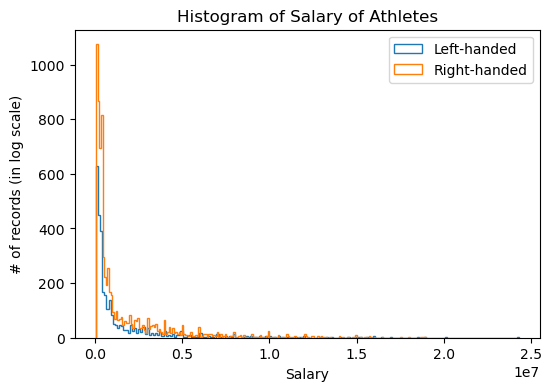

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(df.query("throws == 'L'")["salary"], log=False, bins=200, histtype='step', label="Left-handed")
plt.hist(df.query("throws == 'R'")["salary"], log=False, bins=200, histtype='step', label="Right-handed")

plt.title("Histogram of Salary of Athletes")
plt.xlabel("Salary")
plt.ylabel('# of records (in log scale)')
plt.legend()

plt.show()

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

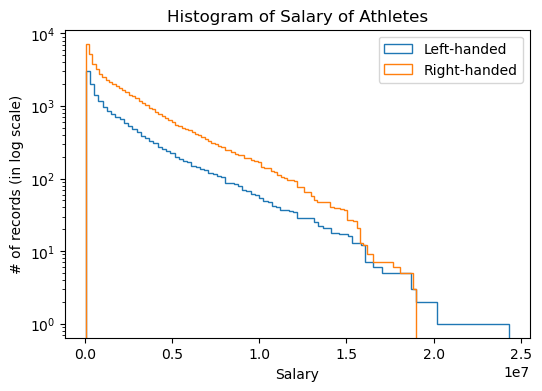

In [21]:
ccdf_salary = plt.figure(figsize=(6, 4))

plt.hist(df.query("throws == 'L'")["salary"], bins=100, log=True, cumulative=-1, histtype='step', label="Left-handed")
plt.hist(df.query("throws == 'R'")["salary"], bins=100, log=True, cumulative=-1, histtype='step', label="Right-handed")

plt.title("Histogram of Salary of Athletes")
plt.xlabel("Salary")
plt.ylabel('# of records (in log scale)')
plt.legend()

plt.show()

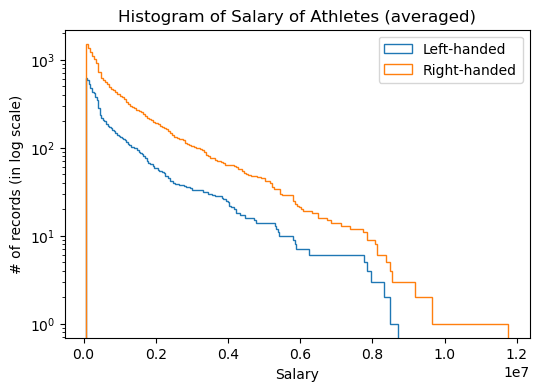

In [15]:
# take the mean average salary of each athlete, so that multiple records of one athlete would only count once
# is it better?
left_salary_mean = df.query("throws == 'L'").groupby(by="playerID").apply(lambda x: x["salary"].mean())
right_salary_mean = df.query("throws == 'R'").groupby(by="playerID").apply(lambda x: x["salary"].mean())

ccdf_salary_mean = plt.figure(figsize=(6, 4))

plt.hist(left_salary_mean, bins=200, log=True, cumulative=-1, histtype='step', label="Left-handed")
plt.hist(right_salary_mean, bins=200, log=True, cumulative=-1, histtype='step', label="Right-handed")

plt.title("Histogram of Salary of Athletes (averaged)")
plt.xlabel("Salary")
plt.ylabel('# of records (in log scale)')
plt.legend()

plt.show()

In [221]:
# plt.loglog(ccdf_left_salary[1][1:], ccdf_left_salary[0])

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

unbalanced data: the numbers of left-handed and right-handed players are not equal, so the group with a larger number tend to have larger y values, making it hard to compare actual distributions

solution: normalize the y-axis to probability from 0 to 1, and plot a probability density function instead

- Issue: There exist some datapoints in multiple years for only one athlete, who may "overrepresenting" the his/her group. For example, a left-handed athlete who earns extremely large salaries across years would yield several datapoints with large salary values, considerably elevating the line for left-handed athletes. As a result, we tend to think left-handed players earn more than right-handed players overall, which may not true.

- Solution: Calculating the mean income for each athlete and plot a new CCDF.

- Issue 1: The CCDF plot only tells the probability of earning above a certain value of salary for athletes in one group. Since the ranges of salaries for left-handed players and right-handed players are different (left-handed players have earned the highest salary), there is no sense comparing two groups of players with the probabilities.

- Solution to issue 1: If we want to compare which group is more likely to earn the salary of X, it's better to use cumulative distribution function. It shows the cumulative probability of earning salary from zero to X (instead of from X to the highest salary in the CCDF), which is more relavant to our motivation.

- Issue 2: There exist some datapoints in multiple years for only one athlete, who may "overrepresenting" his/her group.

- Solution to issue 2: To reduce the larger weight introduced by those "outliers", we can calculate the mean income for each athlete.

**2.3 —** Implement the solution proposed by yourself in the previous question.

In [2]:
plt.hist(df.query("throws == 'L'")["salary"], bins=200, density=True, log=True, cumulative=-1, histtype='step', label="Left-handed")
plt.hist(df.query("throws == 'R'")["salary"], bins=200, density=True, log=True, cumulative=-1, histtype='step', label="Right-handed")

plt.title("Probability Density Function of Salary of Athletes (averaged)")
plt.xlabel("Salary")
plt.ylabel('Probability')
plt.legend()

plt.show()

NameError: name 'plt' is not defined

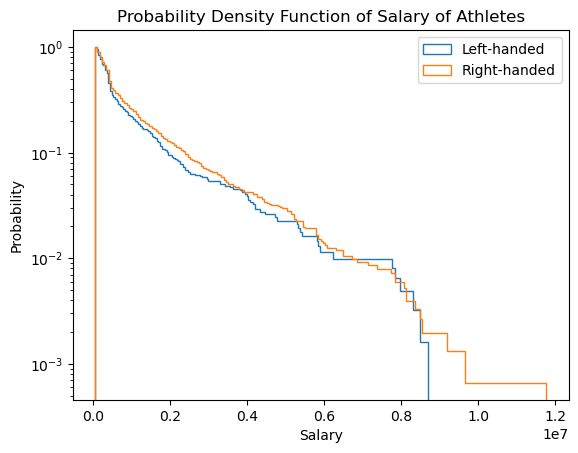

In [17]:
plt.hist(left_salary_mean, bins=200, density=True, log=True, cumulative=-1, histtype='step', label="Left-handed")
plt.hist(right_salary_mean, bins=200, density=True, log=True, cumulative=-1, histtype='step', label="Right-handed")

plt.title("Probability Density Function of Salary of Athletes")
plt.xlabel("Salary")
plt.ylabel('Probability')
plt.legend()

plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

There is no significant difference of salaries between two gruops. However, left-handed players have earned the extreme large salary.

Left-handed and right-handed pitchers have basically the same probability of earning salary below $1.5*10^5$. However, Left-handed pitchers have higher probability of earning salary from $1.5*10^5$ to $1.9*10^6$, though right-handed players have larger probability of earning salary above $10^7$.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

The mean and the 95% confidence intercal for the salary of left-handed pitchers are: 1437232.86 and [1352629.47, 1521836.25]
The mean and the 95% confidence intercal for the salary of right-handed pitchers are: 1597010.14 and [1539504.72, 1654515.55]


D:\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Mean of salary with 95% CI')]

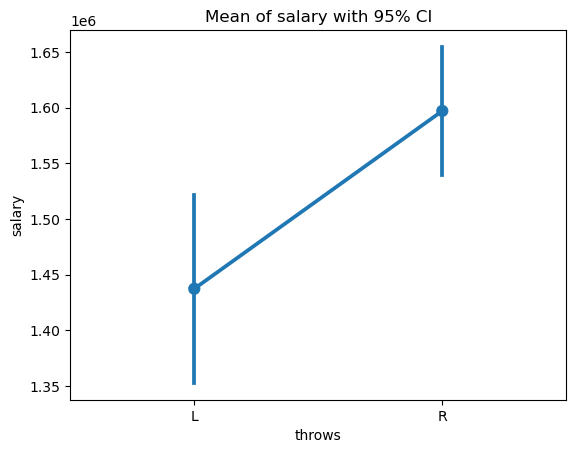

In [25]:
# information about standard error: https://www.youtube.com/watch?v=AQy11Hfp_dU, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1255808/
import math
import seaborn as sns
import scipy.stats as stats

# First
left_salary = df.query("throws == 'L' and not salary.isna()")["salary"].values
right_salary = df.query("throws == 'R' and not salary.isna()")["salary"].values

# Calculate mean and CI for left-handed pitchers
mean_l, std_l = np.mean(left_salary), np.std(left_salary, ddof=1) # calculate the sample mean and sample standard deviation
se_l = std_l / math.sqrt(len(left_salary)) # calculate the standard error of the mean
print(f"The mean and the 95% confidence intercal for the salary of left-handed pitchers are: {mean_l:.2f} \
and [{mean_l - 1.96 * se_l:.2f}, {mean_l + 1.96 * se_l:.2f}]") # calculate the 95% confidence interval (1.96 is the z-score associated with the 95% confidence)

# Calculate mean and CI for right-handed pitchers
mean_r, std_r = np.mean(right_salary), np.std(right_salary, ddof=1)
se_r = std_r / math.sqrt(len(right_salary))
print(f"The mean and the 95% confidence intercal for the salary of right-handed pitchers are: {mean_r:.2f} \
and [{mean_r - 1.96 * se_r:.2f}, {mean_r + 1.96 * se_r:.2f}]")

# Plot the point plot and set 1.96*(standard error) for either side of the error bar
sns.pointplot(x="throws", y="salary", data=df[df["salary"].notnull()].loc[df['throws'].isin(['L','R'])], errorbar=('se', 1.96)).set(title="Mean of salary with 95% CI")

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

Yes, because two error bars do not overlap at the 0.05 level of significance, meaning that there is little chance the mean of the population from which two groups of data are samples be the same.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [23]:
t_stat, p_value = stats.ttest_ind(df.query("throws == 'L' and not salary.isna()")["salary"].values,
                                  df.query("throws == 'R' and not salary.isna()")["salary"].values)
print(f"The t-statistic is: {t_stat}.")
print(f"The p-value is {p_value}.")

The t-statistic is: -3.0106974397099378.
The p-value is 0.0026128052505378953.


According to the p-value of the t-test result, we can reject the null hypothesis that there is no significant difference between the salaries of right-handed and left-handed pitchers. The t-statistic value is negative, indicating that the second group, i.e., the right-handed group, has larger mean value of salary. Therefore, we tend to believe right-handed pitchers earn more.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [24]:
t_stat, p_value = stats.ttest_ind(df.query("throws == 'L' and G >= 5 and not BAOpp.isna()")["BAOpp"].values,
                                  df.query("throws == 'R' and G >= 5 and not BAOpp.isna()")["BAOpp"].values)
print(f"The t-statistic is: {t_stat}.")
print(f"The p-value is {p_value}.")

The t-statistic is: 2.7523037123322776.
The p-value is 0.00592593162655335.


According to the p-value of the t-test result, at the 0.05 level of significance, we can reject the null hypothesis that there is no significant difference between the salaries of right-handed and left-handed pitchers. The t-statistic value is positive, indicating that the first group, i.e., the left-handed group, has larger mean value of opponents' batting average. Since, larger opponents' batting average means more pitches being batted. Therefore, we tend to believe right-handed pitchers are better pitchers.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [21]:
t_stat, p_value = stats.ttest_ind(df.query("throws == 'L' and yearID == 2000 and not salary.isna()")["salary"].values,
                                  df.query("throws == 'R' and yearID == 2000 and not salary.isna()")["salary"].values)
print(f"The t-statistic is: {t_stat}.")
print(f"The p-value is {p_value}.")

The t-statistic is: -0.3682145722424321.
The p-value is 0.7128996415072697.


In [22]:
t_stat, p_value = stats.ttest_ind(df.query("throws == 'L' and G >= 5 and not BAOpp.isna() and yearID==2000")["BAOpp"].values,
                                  df.query("throws == 'R' and G >= 5 and not BAOpp.isna() and yearID==2000")["BAOpp"].values)
print(f"The t-statistic is: {t_stat}.")
print(f"The p-value is {p_value}.")

The t-statistic is: 0.17825458856772244.
The p-value is 0.8585867091589405.


The p-values of the t-test for both the distributions of salaries and the distributions of opponent's batting average are large, indicating that there is no significant difference between left-handed and right-handed group for data of the year 2000 only.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

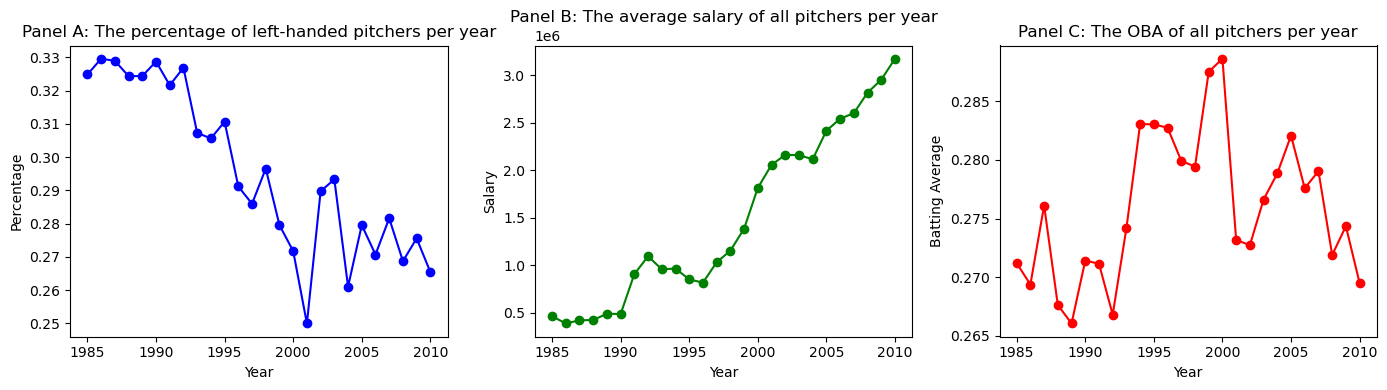

The percentage of left-handed pitchers in 2007 is 28.16%.
The average salary in 2007 is 2600513.74.
The average opponents' batting average in 2007 is 0.28.


In [23]:
# Calculate the values by year
left_handed_percentage_by_year = df.query("not throws.isna()").groupby(by="yearID").apply(lambda x: x.query("throws == 'L'")["throws"].count()/x["throws"].count())
average_salary_by_year = df.query("not salary.isna()").groupby(by="yearID").apply(lambda x: x["salary"].mean())
average_batting_avg_by_year = df.query("not BAOpp.isna()").groupby(by="yearID").apply(lambda x: x["BAOpp"].mean())

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# Panel A: Percentage of left-handed pitchers per year
axs[0].plot(left_handed_percentage_by_year.index, left_handed_percentage_by_year.values, marker='o', color='b')
axs[0].set_title('Panel A: The percentage of left-handed pitchers per year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Percentage')

# Panel B: Average salary of all pitchers per year
axs[1].plot(average_salary_by_year.index, average_salary_by_year.values, marker='o', color='g')
axs[1].set_title('Panel B: The average salary of all pitchers per year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Salary')

# Panel C: Average opponents' batting average of all pitchers per year
axs[2].plot(average_batting_avg_by_year.index, average_batting_avg_by_year.values, marker='o', color='r')
axs[2].set_title("Panel C: The OBA of all pitchers per year")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Batting Average')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

print(f"The percentage of left-handed pitchers in 2007 is {left_handed_percentage_by_year[2007]*100:.2f}%.")
print(f"The average salary in 2007 is {average_salary_by_year[2007]:.2f}.")
print(f"The average opponents' batting average in 2007 is {average_batting_avg_by_year[2007]:.2f}.")

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

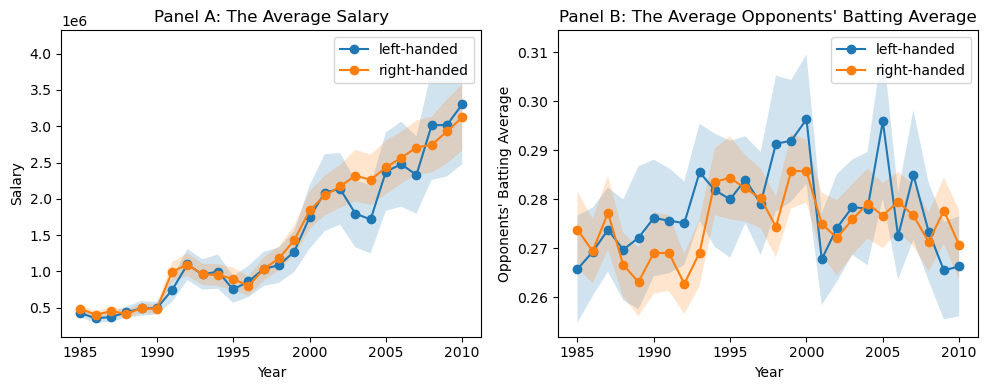

The average salary of left-handed pitchers in 1999 is 1272792.2753623188.
The average opponents' batting average of right-handed pitchers in 1999 is 0.285780487804878.


In [82]:
# calculate the values by year
left_salary_avg_and_ci_by_year = df.query("throws == 'L' and not salary.isna()").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["salary"].mean(),
                                                                                                                          "lower": x["salary"].mean()-1.96*x["salary"].std()/math.sqrt(x["salary"].count()),
                                                                                                                          "upper": x["salary"].mean()+1.96*x["salary"].std()/math.sqrt(x["salary"].count())}))
right_salary_avg_and_ci_by_year = df.query("throws == 'R' and not salary.isna()").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["salary"].mean(),
                                                                                                                          "lower": x["salary"].mean()-1.96*x["salary"].std()/math.sqrt(x["salary"].count()),
                                                                                                                          "upper": x["salary"].mean()+1.96*x["salary"].std()/math.sqrt(x["salary"].count())}))
left_oba_avg_and_ci_by_year = df.query("throws == 'L' and not BAOpp.isna()").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["BAOpp"].mean(),
                                                                                                                          "lower": x["BAOpp"].mean()-1.96*x["BAOpp"].std()/math.sqrt(x["BAOpp"].count()),
                                                                                                                          "upper": x["BAOpp"].mean()+1.96*x["BAOpp"].std()/math.sqrt(x["BAOpp"].count())}))
right_oba_avg_and_ci_by_year = df.query("throws == 'R' and not BAOpp.isna()").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["BAOpp"].mean(),
                                                                                                                          "lower": x["BAOpp"].mean()-1.96*x["BAOpp"].std()/math.sqrt(x["BAOpp"].count()),
                                                                                                                          "upper": x["BAOpp"].mean()+1.96*x["BAOpp"].std()/math.sqrt(x["BAOpp"].count())}))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Panel A: Percentage of left-handed pitchers per year
axs[0].plot(left_salary_avg_and_ci_by_year.index, left_salary_avg_and_ci_by_year.avg, marker='o', label="left-handed")
axs[0].fill_between(left_salary_avg_and_ci_by_year.index, left_salary_avg_and_ci_by_year.lower, left_salary_avg_and_ci_by_year.upper, alpha=0.2)
axs[0].plot(right_salary_avg_and_ci_by_year.index, right_salary_avg_and_ci_by_year.avg, marker='o', label="right-handed")
axs[0].fill_between(right_salary_avg_and_ci_by_year.index, right_salary_avg_and_ci_by_year.lower, right_salary_avg_and_ci_by_year.upper, alpha=0.2)
axs[0].set_title("Panel A: The Average Salary")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Salary")
axs[0].legend()

# Panel B: Average salary of all pitchers per year
axs[1].plot(left_oba_avg_and_ci_by_year.index, left_oba_avg_and_ci_by_year.avg, marker='o', label="left-handed")
axs[1].fill_between(left_oba_avg_and_ci_by_year.index, left_oba_avg_and_ci_by_year.lower, left_oba_avg_and_ci_by_year.upper, alpha=0.2)
axs[1].plot(right_oba_avg_and_ci_by_year.index, right_oba_avg_and_ci_by_year.avg, marker='o', label="right-handed")
axs[1].fill_between(right_oba_avg_and_ci_by_year.index, right_oba_avg_and_ci_by_year.lower, right_oba_avg_and_ci_by_year.upper, alpha=0.2)
axs[1].set_title("Panel B: The Average Opponents' Batting Average")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Opponents' Batting Average")
axs[1].legend()

plt.tight_layout()
plt.show()

print(f"The average salary of left-handed pitchers in 1999 is {left_salary_avg_and_ci_by_year.loc[1999].avg}.")
print(f"The average opponents' batting average of right-handed pitchers in 1999 is {right_oba_avg_and_ci_by_year.loc[1999].avg}.")

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


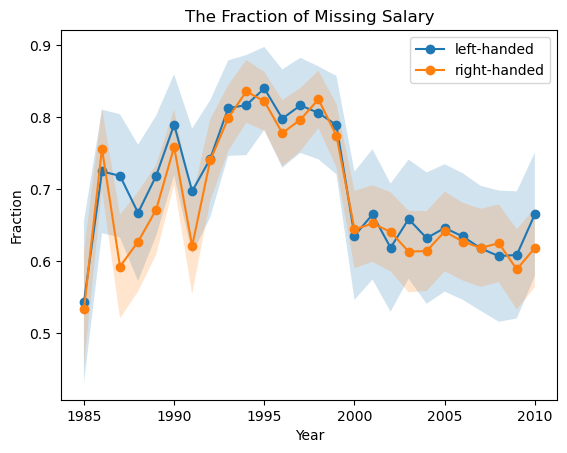

The fraction of left-handed pitchers with salary data missing for the year 2022 is 0.62.


In [36]:
# Calculate the fraction by taking the mean of 1s and 0s (1 for notnull data and 0 for null data), and then calculate the error bar of standard error
left_missing_salary_by_year = df.query("throws == 'L'").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["salary"].notnull().mean(),
                                                                                                    "lower": x["salary"].notnull().mean()-1.96*x["salary"].notnull().std()/math.sqrt(x["salary"].count()),
                                                                                                    "upper": x["salary"].notnull().mean()+1.96*x["salary"].notnull().std()/math.sqrt(x["salary"].count())}))
right_missing_salary_by_year = df.query("throws == 'R'").groupby(by="yearID").apply(lambda x: pd.Series({"avg": x["salary"].notnull().mean(),
                                                                                                    "lower": x["salary"].notnull().mean()-1.96*x["salary"].notnull().std()/math.sqrt(x["salary"].count()),
                                                                                                    "upper": x["salary"].notnull().mean()+1.96*x["salary"].notnull().std()/math.sqrt(x["salary"].count())}))

plt.plot(figsize=(10, 4))

plt.plot(left_missing_salary_by_year.index, left_missing_salary_by_year.avg, marker="o", label="left-handed")
plt.fill_between(left_missing_salary_by_year.index, left_missing_salary_by_year.lower, left_missing_salary_by_year.upper, alpha=0.2)
plt.plot(right_missing_salary_by_year.index, right_missing_salary_by_year.avg, marker="o", label="right-handed")
plt.fill_between(right_missing_salary_by_year.index, right_missing_salary_by_year.lower, right_missing_salary_by_year.upper, alpha=0.2)
plt.title("The Fraction of Missing Salary")
plt.xlabel("Year")
plt.ylabel("Fraction")
plt.legend()
plt.show()

print(f"The fraction of left-handed pitchers with salary data missing for the year 2022 is {left_missing_salary_by_year.loc[2002].avg:.2f}.")

No, the fraction of missing data for right-handed pitchers are basically the same as left-handed pitchers across all years. However, the fraction of missing data for right-handed pithers has narrower confidence intervals across years, meaning that the estimates for missing data in their case are more consistent and less variable. This suggests that the data collection process or reporting for right-handed pitchers is more reliable and stable over time, making it easier to draw meaningful conclusions about this group's performance compared to left-handed pitchers.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

Bias in Analysis: The absence of salary data for the majority of right-handed pitchers could introduce a significant bias in any analysis involving salaries. This bias might lead to incorrect conclusions about the overall distribution and disparities in salaries between right-handed and left-handed pitchers.

Incompleteness: The missing salary data for right-handed pitchers may result in incomplete records. This incompleteness could affect various statistical analyses, leading to challenges in comparing the performance or compensation of right-handed and left-handed pitchers.

Limited Generalizability: It would be challenging to generalize findings about salary-related trends to the entire population of pitchers if the data for right-handed pitchers is mostly missing. This limitation could make it difficult to draw meaningful conclusions and may necessitate additional data collection efforts.

Reduced Statistical Power: With such a large fraction of data missing for right-handed pitchers, the statistical power of any hypothesis testing or regression analysis might be severely reduced. This means that it would be harder to detect meaningful patterns or relationships, and the results may be less reliable.

Biased Comparison: Comparing left-handed and right-handed pitchers may not be valid due to the lack of salary data for right-handed pitchers. This could lead to erroneous conclusions about any potential differences or similarities between the two groups.

Difficulty in Predictive Modeling: If salary data is crucial for predictive modeling (e.g., predicting performance or future salary trends), the missing data for right-handed pitchers would hinder the accuracy and usefulness of such models.

To address these issues, it would be essential to either fill in the missing salary data for right-handed pitchers or carefully consider alternative methods for analysis that account for the missing data, such as imputation techniques or weighting procedures.